# Blob detection using LoG

In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log, blob_dog, blob_doh

from otimage import io, imagerep, imagereg, utils, viewers

## Load Zimmer data

In [3]:
# Path to file containing Zimmer data
in_fpath = '/home/mn2822/Desktop/WormOT/data/zimmer/raw/mCherry_v00065-00115.hdf5'

# Index of frame to use
t_frame = 5

with io.ZimmerReader(in_fpath) as reader:
    units = reader.units
    img = reader.get_frame(t_frame)

## Select test image

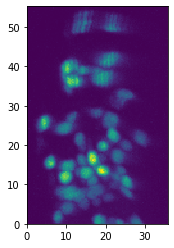

In [4]:
# Section of XY plane where head is found
head_x = (420, 530)
head_y = (350, 520)
head_z = (0, 33)

# Extract section
img_test = img[head_x[0]:head_x[1], head_y[0]:head_y[1], head_z[0]:head_z[1]]

# Display max projection
utils.plot_maxproj_units(img_test, units)

In [5]:
blobs = blob_log(img_test, threshold=0.001)

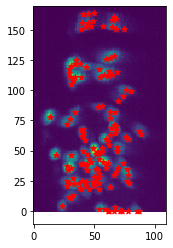

In [6]:
utils.plot_maxproj(img_test)
for i in range(148):
    plt.scatter(blobs[i, 0], blobs[i, 1], color='red', marker='*')

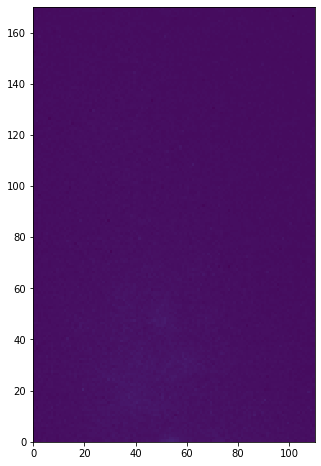

In [7]:
pts = blobs[:, 0:3]
units = np.array([1.0, 1.0, 1.0])

viewers.CellLocationViewer(img_test, pts, units)